### In this project, we will build a text classification model on song lyrics. The task is to predict the artist from a piece of text. 

- Download a HTML page with links to songs

- Extract hyperlinks of song pages

- Download and extract the song lyrics

- Vectorize the text using the Bag Of Words method

- train a classification model that predicts the artist from a piece of text

- refactor the code into functions

- Write a simple command-line interface for the program

##  STEP1. WEB SCRAPING

Download a HTML page with links to songs. To download web pages or send other HTTP requests in Python -->  requests module

In [1]:
import requests          #to download pages
import re

In [2]:
#if we get a 403, try this:
#user_agent = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
#source = requests.get("https://www.1001tracklists.com/", headers=user_agent)

### ARCADE FIRE LYRICS

In [3]:
url = 'http://www.songlyrics.com/arcade-fire-lyrics/'

#### Use the requests module to download that page

In [4]:
response_arcade = requests.get(url)     #apply requests on my url


In [5]:
response_arcade
# return code: 200 : OK
#              404 : not found
#              500 : internal server error
#              403 : forbidden

<Response [200]>

In [6]:
response_arcade.text      # this is the URL code

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "https://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="https://www.w3.org/1999/xhtml" lang="en-US">\n<head>\n\t<title>ARCADE FIRE LYRICS</title>\n\t<meta http-equiv="content-type" content="text/html; charset=utf-8" />\n\t<meta name="description" content="Arcade Fire song lyrics collection. Browse 198 lyrics and 178 Arcade Fire albums." />\n\t\n\t<meta name="msvalidate.01" content="CF28C9C2E5FDBD5C7CA7F6FE394BD121" />\n\t\t\t<meta name="robots" content="noydir, noodp" />\n\t\t<meta property="fb:admins" content="31113169,100000933112467,1383859676" />\n\t<meta name="fb:app_id" content="1418134321780018" />\n\t<meta name="viewport" content="width=device-width, initial-scale=1"> <!-- viewport -->\n\t<meta property="og:type" content="band"/>\n\t<meta property="og:title" content="Arcade Fire"/>\n\t<meta property="og:image" content="http://cdn2.songlyricscom.netdna-cdn.com/album_covers/130/arcade-fire-reflektor

In [7]:
# save the string response_arcade.text to a newly created text file (in 'w'riting mode)
filename = 'arcade_fire.html'
open(filename, 'w', encoding = 'utf8').write(response_arcade.text)  #open :creates the file in writing mode

254160

#### I want to get all the links : everything that starts with "href"   --- USE REGULAR EXPRESSIONS

Regular Expressions are a powerful language for matching patterns in text

In [11]:
#to get all the links
links_arcade = re.findall('href="([^"]+)"', response_arcade.text)  #find everything that starts with href 
links_arcade

['http://www.songlyrics.com',
 '//cdn2.songlyricscom.netdna-cdn.com',
 '//cdn1.songlyricscom.netdna-cdn.com',
 '//news.songlyricscom.netdna-cdn.com',
 '//pagead2.googlesyndication.com',
 '//googleads.g.doubleclick.net',
 'favicon.ico',
 'css/global.min.10.css?v=2',
 '/',
 '/top-songs-lyrics.html',
 '/top100.php',
 '/top-upcoming-songs.html',
 '/latestAddedSongs',
 '/news/top-songs/2011/',
 '/news/top-songs/2010/',
 '/news/top-songs/2009/',
 '/news/top-songs/all-time/',
 '/top-artists-lyrics.html',
 '/top-artists-lyrics.html',
 '/a/',
 '/top-albums-lyrics.html',
 '/top-upcoming-albums.html',
 '/adele-lyrics/',
 '/rihanna-lyrics/',
 '/katy-perry-lyrics/',
 '/lady-gaga-lyrics/',
 '/lil-wayne-lyrics/',
 '/musicgenres.php',
 '/rock-lyrics.php',
 '/r-and-b-lyrics.php',
 '/country-music-lyrics.php',
 '/hip-hop-rap-lyrics.php',
 '/pop-lyrics.php',
 '/christian-lyrics.php',
 '/dance-lyrics.php',
 '/latin-lyrics.php',
 '/musicgenres.php',
 '/news/',
 '/news/',
 '/news/category/news-roundup/',
 '

In [12]:
links_arcade[:5]

['http://www.songlyrics.com',
 '//cdn2.songlyricscom.netdna-cdn.com',
 '//cdn1.songlyricscom.netdna-cdn.com',
 '//news.songlyricscom.netdna-cdn.com',
 '//pagead2.googlesyndication.com']

#### Of all this bunch of links, we are only interested in the ones that go to a lyrics page. 
I use a list comprehension to clean it

In [13]:
links_arcade = [l for l in links_arcade if l.endswith('lyrics/') and l.startswith('http://www.songlyrics.com/')]

In [14]:
artist = links_arcade[0].split('/')[-3]        #split first element of links_arcade by '/' and save as artist

In [15]:
artist

'arcade-fire'

In [16]:
links_final_arcade = [l for l in links_arcade if artist in l]

In [17]:
len(links_final_arcade)

198

Analyzing the links, I have seen that there are some repeated links. Let's delete them

In [18]:
all_songs=[]
for links in links_final_arcade:
    song=links.split('/')[-2]
    all_songs.append(song)
#for links in links_final_imp

In [19]:
links_cleaned_arcade = []
[links_cleaned_arcade.append(n) for n in links_final_arcade if n not in links_cleaned_arcade] 
len(links_cleaned_arcade)

180

In [20]:
seen = set()
uniq = [x for x in links_final_arcade if x not in seen and not seen.add(x)]   
len(uniq)

180

In [21]:
set([x for x in all_songs if links_final_arcade.count(x) > 1])  

set()

#### How can we see duplicate items in a list? ----->   ITERATION_UTILITIES library
https://pypi.org/project/iteration-utilities/

In [22]:
from iteration_utilities import duplicates
list(duplicates(links_final_arcade))                #create a list with duplicates just to check it

['http://www.songlyrics.com/arcade-fire/neighborhood-3-power-out-lyrics/',
 'http://www.songlyrics.com/arcade-fire/antichrist-television-blues-lyrics/',
 'http://www.songlyrics.com/arcade-fire/infinite-content-lyrics/',
 'http://www.songlyrics.com/arcade-fire/neighborhood-2-laika-lyrics/',
 'http://www.songlyrics.com/arcade-fire/neighborhood-3-power-out-lyrics/',
 'http://www.songlyrics.com/arcade-fire/neighborhood-1-tunnels-lyrics/',
 'http://www.songlyrics.com/arcade-fire/neighborhood-1-tunnels-lyrics/',
 'http://www.songlyrics.com/arcade-fire/sprawl-ii-mountains-beyond-mountains-remixed-by-damian-taylor-arcade-fire-lyrics/',
 'http://www.songlyrics.com/arcade-fire/wasted-hours-extended-version-lyrics/',
 'http://www.songlyrics.com/arcade-fire/vampire-forest-fire-lyrics/',
 'http://www.songlyrics.com/arcade-fire/vampire-forest-fire-lyrics/',
 'http://www.songlyrics.com/arcade-fire/vampires-forest-fire-lyrics/',
 'http://www.songlyrics.com/arcade-fire/electric-blue-lyrics/',
 'http://

#### How can we get rid of these repeated items?

In [23]:
links_cleaned_arcade = []
[links_cleaned_arcade.append(n) for n in links_arcade if n not in links_cleaned_arcade] 
links_cleaned_arcade

['http://www.songlyrics.com/arcade-fire/reflektor-lyrics/',
 'http://www.songlyrics.com/arcade-fire/afterlife-lyrics/',
 'http://www.songlyrics.com/arcade-fire/here-comes-the-night-time-lyrics/',
 'http://www.songlyrics.com/arcade-fire/rococo-lyrics/',
 'http://www.songlyrics.com/arcade-fire/normal-person-lyrics/',
 'http://www.songlyrics.com/arcade-fire/sprawl-ii-mountains-beyond-mountains-lyrics/',
 'http://www.songlyrics.com/arcade-fire/we-exist-lyrics/',
 'http://www.songlyrics.com/arcade-fire/the-suburbs-lyrics/',
 'http://www.songlyrics.com/arcade-fire/rebellion-lies-lyrics/',
 'http://www.songlyrics.com/arcade-fire/joan-of-arc-lyrics/',
 'http://www.songlyrics.com/arcade-fire/porno-lyrics/',
 'http://www.songlyrics.com/arcade-fire/ready-to-start-lyrics/',
 'http://www.songlyrics.com/arcade-fire/we-used-to-wait-lyrics/',
 'http://www.songlyrics.com/arcade-fire/wake-up-lyrics/',
 'http://www.songlyrics.com/arcade-fire/you-already-know-lyrics/',
 'http://www.songlyrics.com/arcade-f

In [24]:
len(links_arcade), len(links_cleaned_arcade)

(209, 191)

In [25]:
#import time

#for songs in links_final: 
    
    #response = requests.get(songs)
    # ....save the file etc.
    #print(songs, response.status_code)
    #time.sleep(10) # do nothing for 10 seconds

In [26]:
type(links_cleaned_arcade)

list

##### Beautiful Soup: convert HTML string to a Beautiful Soup object to parse the data

I want to get just the data that I want from every page.

In [27]:
from bs4 import BeautifulSoup

In [28]:
arcade_lyr = []
for url in links_final_arcade:
    response = requests.get(url)
    soup = BeautifulSoup(response.text)    #with soup, response.text now looks better
    lyr = soup.find(id={"songLyricsDiv-outer"}).text   #in every HTML, find the first"songLyricsDiv-outer"
    arcade_lyr.append(lyr)                             #.text returns the actual part of the tag that is outside of the < angled brackets > 
    

In [29]:
type(soup)

bs4.BeautifulSoup

In [30]:
arcade_lyr

["\nTrapped in a prism\r\nIn a prism of light\r\nAlone in the darkness\r\nDarkness of white\r\nWe fell in love\r\nAlone on a stage\r\nIn the reflective age\n\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\r\n If this is heaven\r\nI don’t know what it’s for\r\nIf I can’t find you there\r\nI don’t care\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nIt’s just a Reflektor (It’s just a Reflektor)\n\r\nNow, the signals we send\r\nAre deflected again\r\nWe’re still connected\r\nBut are we even friends?\n\r\nWe fell in love when I was nineteen\r\nAnd I was staring at a screen\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\n\r\nIf this is heaven\r\nI need something more\r\nJust a place to be alone\r\nCause you’re my home\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nI

In [31]:
len(arcade_lyr)

198

Should we remove \r and \n? (look at reflektor_lyrics file)

In [29]:
#arcade_lyrics = []
#for element in arcade_lyr:
 #   arcade_lyrics.append(element.splitlines())
    
    
    

### TAME IMPALA LYRICS

In [32]:
url_impala = 'http://www.songlyrics.com/tame-impala-lyrics/'

In [33]:
response_impala = requests.get(url_impala)  

In [34]:
response_impala

<Response [200]>

In [35]:
response_impala.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "https://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="https://www.w3.org/1999/xhtml" lang="en-US">\n<head>\n\t<title>TAME IMPALA LYRICS</title>\n\t<meta http-equiv="content-type" content="text/html; charset=utf-8" />\n\t<meta name="description" content="Tame Impala song lyrics collection. Browse 140 lyrics and 132 Tame Impala albums." />\n\t\n\t<meta name="msvalidate.01" content="CF28C9C2E5FDBD5C7CA7F6FE394BD121" />\n\t\t\t<meta name="robots" content="noydir, noodp" />\n\t\t<meta property="fb:admins" content="31113169,100000933112467,1383859676" />\n\t<meta name="fb:app_id" content="1418134321780018" />\n\t<meta name="viewport" content="width=device-width, initial-scale=1"> <!-- viewport -->\n\t<meta property="og:type" content="band"/>\n\t<meta property="og:title" content="Tame Impala"/>\n\t<meta property="og:image" content="http://cdn2.songlyricscom.netdna-cdn.com/album_covers/80/tame-impala-innerspeak

In [34]:
# save the string response.text to a newly created text file (in 'w'riting mode)
filename_impala = 'tame_impala.html'
open(filename_impala, 'w', encoding = 'utf8').write(response_impala.text)  #open :creates the file in writing mode

189332

In [36]:
#to get all the links
links_impala = re.findall('href="([^"]+)"', response_impala.text)  #find everything that starts with href 
links_impala

['http://www.songlyrics.com',
 '//cdn2.songlyricscom.netdna-cdn.com',
 '//cdn1.songlyricscom.netdna-cdn.com',
 '//news.songlyricscom.netdna-cdn.com',
 '//pagead2.googlesyndication.com',
 '//googleads.g.doubleclick.net',
 'favicon.ico',
 'css/global.min.10.css?v=2',
 '/',
 '/top-songs-lyrics.html',
 '/top100.php',
 '/top-upcoming-songs.html',
 '/latestAddedSongs',
 '/news/top-songs/2011/',
 '/news/top-songs/2010/',
 '/news/top-songs/2009/',
 '/news/top-songs/all-time/',
 '/top-artists-lyrics.html',
 '/top-artists-lyrics.html',
 '/a/',
 '/top-albums-lyrics.html',
 '/top-upcoming-albums.html',
 '/adele-lyrics/',
 '/rihanna-lyrics/',
 '/katy-perry-lyrics/',
 '/lady-gaga-lyrics/',
 '/lil-wayne-lyrics/',
 '/musicgenres.php',
 '/rock-lyrics.php',
 '/r-and-b-lyrics.php',
 '/country-music-lyrics.php',
 '/hip-hop-rap-lyrics.php',
 '/pop-lyrics.php',
 '/christian-lyrics.php',
 '/dance-lyrics.php',
 '/latin-lyrics.php',
 '/musicgenres.php',
 '/news/',
 '/news/',
 '/news/category/news-roundup/',
 '

In [37]:
#to get all the links
links_impala = re.findall('href="([^"]+)"', response_impala.text)  #find everything that starts with href 
links_impala

['http://www.songlyrics.com',
 '//cdn2.songlyricscom.netdna-cdn.com',
 '//cdn1.songlyricscom.netdna-cdn.com',
 '//news.songlyricscom.netdna-cdn.com',
 '//pagead2.googlesyndication.com',
 '//googleads.g.doubleclick.net',
 'favicon.ico',
 'css/global.min.10.css?v=2',
 '/',
 '/top-songs-lyrics.html',
 '/top100.php',
 '/top-upcoming-songs.html',
 '/latestAddedSongs',
 '/news/top-songs/2011/',
 '/news/top-songs/2010/',
 '/news/top-songs/2009/',
 '/news/top-songs/all-time/',
 '/top-artists-lyrics.html',
 '/top-artists-lyrics.html',
 '/a/',
 '/top-albums-lyrics.html',
 '/top-upcoming-albums.html',
 '/adele-lyrics/',
 '/rihanna-lyrics/',
 '/katy-perry-lyrics/',
 '/lady-gaga-lyrics/',
 '/lil-wayne-lyrics/',
 '/musicgenres.php',
 '/rock-lyrics.php',
 '/r-and-b-lyrics.php',
 '/country-music-lyrics.php',
 '/hip-hop-rap-lyrics.php',
 '/pop-lyrics.php',
 '/christian-lyrics.php',
 '/dance-lyrics.php',
 '/latin-lyrics.php',
 '/musicgenres.php',
 '/news/',
 '/news/',
 '/news/category/news-roundup/',
 '

In [38]:
#links_final_impala = [m for m in links_impala if m.endswith('lyrics/') and m.startswith('http://www.songlyrics.com/)]

If I put the same code as I did with Arcade Fire, it shows 11 links that doesn't fit with that I want.
For this reason I change a little bit the code to adapt it.

In [39]:
links_final_impala = [m for m in links_impala if m.endswith('lyrics/') and m.startswith('http://www.songlyrics.com/tame-impala')]

In [40]:
links_final_impala

['http://www.songlyrics.com/tame-impala/alter-ego-lyrics/',
 'http://www.songlyrics.com/tame-impala/lucidity-lyrics/',
 'http://www.songlyrics.com/tame-impala/solitude-is-bliss-lyrics/',
 'http://www.songlyrics.com/tame-impala/desire-be-desire-go-lyrics/',
 'http://www.songlyrics.com/tame-impala/runway-houses-city-clouds-lyrics/',
 'http://www.songlyrics.com/tame-impala/jeremy-s-storm-lyrics/',
 'http://www.songlyrics.com/tame-impala/led-zeppelin-lyrics/',
 'http://www.songlyrics.com/tame-impala/island-walking-lyrics/',
 'http://www.songlyrics.com/tame-impala/sestri-levante-lyrics/',
 'http://www.songlyrics.com/tame-impala/half-full-glass-of-wine-lyrics/',
 'http://www.songlyrics.com/tame-impala/expectation-lyrics/',
 'http://www.songlyrics.com/tame-impala/lucidity-pilooski-remix-lyrics/',
 'http://www.songlyrics.com/tame-impala/why-won-t-you-make-up-your-mind-erol-alkan-rework-edit-lyrics/',
 'http://www.songlyrics.com/tame-impala/desire-be-desire-do-lyrics/',
 'http://www.songlyrics.

In [41]:
artist_2 = links_final_impala[0].split('/')[-3]

In [42]:
artist_2

'tame-impala'

In [43]:
len(links_final_impala)

140

Now I have just the link that I want, just Tame Impala lyrics

In [44]:
#import time

#for songs_impala in links_final_impala: 
    
#    response_impala = requests.get(songs_impala)
     # ...save the file etc.
#    print(songs_impala, response_impala.status_code)
#    time.sleep(10) # do nothing for 10 seconds

In [45]:
len(links_final_impala)

140

#### I put a try/except just to be sure that all the links are good

In [46]:
impala_lyr = []
for url in links_final_impala:
    response_impala = requests.get(url)
    soup_impala = BeautifulSoup(response_impala.text)
    lyr_impala = soup_impala.find(id={"songLyricsDiv-outer"}).text
    impala_lyr.append(lyr_impala)
    
    

In [46]:
#If it doesn't work, test with and try/except
#impala_lyr = []
#for url in links_final_impala:
#    response_impala = requests.get(url)
#    soup_impala = BeautifulSoup(response_impala.text)
#    try: #try all the code in this block, if you hit a bug, move to the except block
#        lyr_impala = soup_impala.find(id={"songLyricsDiv-outer"}).text
#        impala_lyr.append(lyr_impala)
#    except: #run this in case of bugs
#        pass

In [47]:
impala_lyr

["\nSaid the voice from afar,\nDon't you know it doesn't\nhave to be so hard? Waiting for\neveryone else around to argee,\nmight take too long\n\nWhen it won't be so hard,\n(it won't be so hard)\n\nWell it's true,yes, but you\nwont't get far telling me\nthat you are all you're meant\nto be, when the one from my\ndream is sitting right next\nto me and I don't know\nwhat to do\n\nOh alter ego.\n\nGet them to love you,\nwhile the may depending\non your words and wealth,\nthe only one who's really\njudging you is yourself.\nNobodyy else.\n\nIf I could part,\nit wouldn't be so hard.\n\nWell it's true yes, but you\nwon't get far telling me that\nyou are all you're meant to\nbe when the one from my\ndream is sitting right next\nto me and I don't know\nwhat to do.\n\nOh alter ego.\n",
 "\nI know where you went but\nI don't know how you got\nthere, I know where you\nwent but I don't know how\nyou got there, Silver tongue\nhill where you talk up what\nI' d play down, I would\nspeak up but I woul

In [48]:
len(impala_lyr)

140

In [49]:
len(arcade_lyr)

198

## Select columns for y and X
I have artists data separated, but I want to join them to only have one X and one Y

In [50]:
X1 = arcade_lyr
X2 = impala_lyr

arcade_artist = ['arcade_fire']             #create a list with 198 times "arcade fire"
impala_artist = ['tame_impala']             #create a list with 140 times "tame_impala"

y1 = 198*arcade_artist
y2 = 140*impala_artist


In [51]:
len(X1), len(y1), len(X2), len(y2)

(198, 198, 140, 140)

In [52]:
type(X1), type(y1), type(X2), type(y2)

(list, list, list, list)

##### I want to merge X1,X2 and y1,y2 

In [53]:
mergedlist = []
mergedlist.extend(arcade_lyr)
mergedlist.extend(impala_lyr)
mergedlist

["\nTrapped in a prism\r\nIn a prism of light\r\nAlone in the darkness\r\nDarkness of white\r\nWe fell in love\r\nAlone on a stage\r\nIn the reflective age\n\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\r\n If this is heaven\r\nI don’t know what it’s for\r\nIf I can’t find you there\r\nI don’t care\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nIt’s just a Reflektor (It’s just a Reflektor)\n\r\nNow, the signals we send\r\nAre deflected again\r\nWe’re still connected\r\nBut are we even friends?\n\r\nWe fell in love when I was nineteen\r\nAnd I was staring at a screen\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\n\r\nIf this is heaven\r\nI need something more\r\nJust a place to be alone\r\nCause you’re my home\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nI

In [54]:
mergedlist[100]    #---- lyrics from Arcade Fire
mergedlist[197]    #---- lyrics from Arcade Fire - Intervention
mergedlist[198]    #---- lyrics from Tame Impala - Alter Ego ----- Till the end all from Tame Impala

"\nSaid the voice from afar,\nDon't you know it doesn't\nhave to be so hard? Waiting for\neveryone else around to argee,\nmight take too long\n\nWhen it won't be so hard,\n(it won't be so hard)\n\nWell it's true,yes, but you\nwont't get far telling me\nthat you are all you're meant\nto be, when the one from my\ndream is sitting right next\nto me and I don't know\nwhat to do\n\nOh alter ego.\n\nGet them to love you,\nwhile the may depending\non your words and wealth,\nthe only one who's really\njudging you is yourself.\nNobodyy else.\n\nIf I could part,\nit wouldn't be so hard.\n\nWell it's true yes, but you\nwon't get far telling me that\nyou are all you're meant to\nbe when the one from my\ndream is sitting right next\nto me and I don't know\nwhat to do.\n\nOh alter ego.\n"

In [55]:
len(mergedlist)                         #it has to be 338!

338

In [56]:
merged_artist = []
merged_artist.extend(y1)
merged_artist.extend(y2)
merged_artist


['arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade_fire',
 'arcade

In [57]:
merged_artist = ['1' if artist == 'arcade_fire' else artist for artist in merged_artist]
merged_artist = ['0' if artist == 'tame_impala' else artist for artist in merged_artist]
merged_artist[197]      #0-197 is arcade fire (1)
merged_artist[198]      #198-end is tame impala (0)     

'0'

In [58]:
len(merged_artist),  len(mergedlist)                    #same shape, perfect!

(338, 338)

In [59]:
X = mergedlist
y = merged_artist


In [60]:
X

["\nTrapped in a prism\r\nIn a prism of light\r\nAlone in the darkness\r\nDarkness of white\r\nWe fell in love\r\nAlone on a stage\r\nIn the reflective age\n\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\r\n If this is heaven\r\nI don’t know what it’s for\r\nIf I can’t find you there\r\nI don’t care\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nIt’s just a Reflektor (It’s just a Reflektor)\n\r\nNow, the signals we send\r\nAre deflected again\r\nWe’re still connected\r\nBut are we even friends?\n\r\nWe fell in love when I was nineteen\r\nAnd I was staring at a screen\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\n\r\nIf this is heaven\r\nI need something more\r\nJust a place to be alone\r\nCause you’re my home\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nI

## STEP2. Bag of Words
### Method that converts a text corpus into a numerical matrix, so that Machine Learning metods can use it as training data.

### Vectorize the text using the Bag Of Words method

### The Count Vectorizer (converting text into numbers):
#### Steps to build
* Create a corpus
* Fit a CV on it - train the algorithm on all the language
* Transform the corpus - for each document, turn it into a sparse, then dense, matrix

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import pandas as pd

In [62]:
cv = CountVectorizer()
vectorized_lyr = cv.fit_transform(X)
vectorized_lyr                             #now we have a 338x2926 SPARSE MATRIX
#3386 rows = all the lyrics
#2926 columns = all the words

<338x2926 sparse matrix of type '<class 'numpy.int64'>'
	with 23134 stored elements in Compressed Sparse Row format>

In [63]:
vectorized_lyr[:5].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [64]:
cv.get_feature_names()

['11',
 '12',
 '12th',
 '13',
 '18',
 '1963',
 '1980s',
 '1984',
 '200',
 '2009',
 '2010',
 '2pac',
 '30',
 '57',
 '5x',
 '641',
 'aaaah',
 'abandoned',
 'abc',
 'about',
 'above',
 'abraham',
 'absurd',
 'accept',
 'ache',
 'aching',
 'across',
 'act',
 'acting',
 'action',
 'actors',
 'ad',
 'add',
 'address',
 'adjust',
 'administration',
 'admit',
 'adresss',
 'adventure',
 'advice',
 'afar',
 'affect',
 'afford',
 'afraid',
 'after',
 'afterglow',
 'afterlife',
 'again',
 'against',
 'age',
 'agenda',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahh',
 'ahhh',
 'ahhhhhhhh',
 'aid',
 'aie',
 'ain',
 'aint',
 'air',
 'airplane',
 'aisle',
 'alan',
 'alarm',
 'alarme',
 'alarms',
 'alex',
 'alexander',
 'alice',
 'alidocious',
 'alive',
 'all',
 'allegiance',
 'allies',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'alonzo',
 'alors',
 'aloud',
 'already',
 'alright',
 'also',
 'alter',
 'always',
 'alzheimer',
 'am',
 'amazing',
 'amber',
 'ambulances',
 'america',
 'american',
 'amo

In [65]:
len(cv.get_feature_names())     #2926 words

2926

### Create a DF

In [67]:
readable_lyr_vectors = pd.DataFrame(vectorized_lyr.todense(), columns=cv.get_feature_names(), index=X)

In [68]:
readable_lyr_vectors

,11,12,12th,13,18,1963,1980s,1984,200,2009,...,yolk,you,young,your,youre,yours,yourself,zone,écho,él
"\nTrapped in a prism\r\nIn a prism of light\r\nAlone in the darkness\r\nDarkness of white\r\nWe fell in love\r\nAlone on a stage\r\nIn the reflective age\n\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\r\n If this is heaven\r\nI don’t know what it’s for\r\nIf I can’t find you there\r\nI don’t care\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nIt’s just a Reflektor (It’s just a Reflektor)\n\r\nNow, the signals we send\r\nAre deflected again\r\nWe’re still connected\r\nBut are we even friends?\n\r\nWe fell in love when I was nineteen\r\nAnd I was staring at a screen\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\n\r\nIf this is heaven\r\nI need something more\r\nJust a place to be alone\r\nCause you’re my home\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nIt’s just a Reflektor (It’s just a Reflektor, just a Reflektor)\n\r\nIt’s just a Reflektor, just a Reflektor\r\nIt’s just a Reflektor, just a Reflektor\r\nJust a Reflektor, Reflektor\n\r\nJust a reflektor (repeat)\n\r\nJust a reflection of a reflection\r\nOf a reflection of a reflection of a reflection, ah!\n\r\nWill I see you on the other side?\r\nWe all got things to hide\n\r\nIt’s just a reflection of a reflection\r\nOf a reflection of a reflection of a reflection, ah!\n\r\nWill I see you on the other side?\r\nWe all got things to hide\n\r\nAlright, let’s go back!\n\r\nOur song escapes\r\nOn neon silver discs\r\nOur love is plastic\r\nWe’ll break it to bits\n\r\nI want to break free\r\nBut will they break me?\r\nDown, down, down\r\nDon’t mess around\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nIt’s just a Reflektor (It’s just a Reflektor)\n\r\nIt's just a Reflektor (repeat)\n\r\nThought you would bring me to the ressurector\r\nTurns out it was just a Reflektor (It’s just a Reflektor)\r\nThought you would bring to me the ressurector\r\nTurns out it was just a Reflektor (It’s just a Reflektor)\r\nThought you would bring to me the ressurector\r\nTurns out it was just a Reflektor (It’s just a Reflektor)\n\r\nIt’s a Reflektor\r\nJust a Reflektor\r\nJust a Reflektor\n\r\nWill I see you on the other side?\n\r\nIt’s just a Reflektor\n\r\n(AH!)\n\r\nWill I see you on the other side? (Reflektor!)\r\nWe all got things to hide (Reflektor!)\n\r\nIt’s just a Reflektor\n\r\nWill I see you on the other side? \n",0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,0,0
"\n[Verse 1]\nAfterlife, oh my God, what an awful word\r\nAfter all the breath and the pill and the fires that burn\r\nAnd after all this time, and after all the ambulances go\r\nAnd after all the hangers-on are done hanging on to the dead lights\r\nOf the afterglow.\n\r\nI've gotta know,\n\n[Chorus]\r\nCan we work it out?\r\nWe scream and shout 'till we work it out\r\nCan we just work it out?\r\nScream and shout 'till we work it out?\r\n'till we work it out, 'till we work it out\r\n'till we work it out, 'till we work it out\n\r\n[Verse 2]\r\nAfterlife, I think I saw what happens next\r\nIt was just a glimpse of you, like looking through a window\r\nOr a shallow sea\r\nCould you see me?\r\nAnd after all this time\r\nIt's like nothing else we used to know\r\nAfter all the hangers-on are done hanging on to the dead lights\r\nOf the afterglow\n\r\nI've gotta know,\n\r\n[Chorus]\r\nCan we work it out?\r\nLet's scream and shout 'till we work it out\r\nCan we just work it out?\r\nScream and shout 'till we work it out?\n\r\n[Bridge]\r\nBut you say\r\nOh\r\nWhen love is gone\r\nWhere does it go?\r\nAnd you say\r\nOh\r\nWhen love is gone\r\nWhere does it go?\r\nAnd where do we go?\r\nWhere do we go?\r\nWhere do we go?\r\nWhere do we go?\n\r

In [69]:
readable_lyr_vectors.sum()

11           1
12           1
12th         1
13           3
18           1
            ..
yours       34
yourself     8
zone         2
écho         4
él           1
Length: 2926, dtype: int64

In [70]:
readable_lyr_vectors.shape

(338, 2926)

In [71]:
readable_lyr_vectors.sum(axis=1)            #row 1 has 380 words

\nTrapped in a prism\r\nIn a prism of light\r\nAlone in the darkness\r\nDarkness of white\r\nWe fell in love\r\nAlone on a stage\r\nIn the reflective age\n\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\r\n If this is heaven\r\nI don’t know what it’s for\r\nIf I can’t find you there\r\nI don’t care\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nIt’s just a Reflektor (It’s just a Reflektor)\n\r\nNow, the signals we send\r\nAre deflected again\r\nWe’re still connected\r\nBut are we even friends?\n\r\nWe fell in love when I was nineteen\r\nAnd I was staring at a screen\r\nEntre la nuit, la nuit et L'Aurore,\r\nEntre le royaume des vivants et des morts\n\r\nIf this is heaven\r\nI need something more\r\nJust a place to be alone\r\nCause you’re my home\n\r\nI thought I found a way to enter\r\nIt’s just a Reflektor (It’s just a Reflektor)\r\nI thought I found the connector\r\nIt’

#### We have 2926 words, but we can reduce them using Tokenization, Stop words (and Normalizing the counts)

In [72]:
a = '(?u)\\b\\w\\w+\\b' #all words or numbers with length >1    ----  2712
b = '(?u)\\b\\w\\w*\\b' #all words or numbers of any length     ----  2695
c = '(?u)\\b[a-zA-Z]+\\b' #only returns words, ignores all numbers and special characters    ----   2681
cv = CountVectorizer(token_pattern=c, stop_words='english')
vectorized_lyr = cv.fit_transform(X)
vectorized_lyr 

<338x2681 sparse matrix of type '<class 'numpy.int64'>'
	with 13623 stored elements in Compressed Sparse Row format>

In [73]:
a = '(?u)\\b\\w\\w+\\b' #all words or numbers with length >1
b = '(?u)\\b\\w\\w*\\b' #all words or numbers of any length
c = '(?u)\\b[a-zA-Z]+\\b' #only returns words, ignores all numbers and special characters

pipeline = Pipeline([
    ('vect', CountVectorizer(token_pattern=c, stop_words='english')),   #CountVectorizer to transform the corpus into a matrix
    ('tfidf', TfidfTransformer())                     #TfidTransformer to normalize the counts
    ])
#strip_accents='ascii'

In [74]:
vectorized_lyrics = pipeline.fit_transform(X)
vectorized_lyrics                                         #the data has been reduced till 2681

<338x2681 sparse matrix of type '<class 'numpy.float64'>'
	with 13623 stored elements in Compressed Sparse Row format>

In [75]:
readable_tf_vectors = pd.DataFrame(vectorized_lyrics.todense().round(2), columns=cv.get_feature_names(), index=y)
type(readable_tf_vectors)

#readable_lyr_vectors = pd.DataFrame(vectorized_lyr.todense(), columns=cv.get_feature_names(), index=X)


pandas.core.frame.DataFrame

In [76]:
readable_tf_vectors        #we have til 2681 columns

,aaaah,abandoned,abc,abraham,absurd,accept,ache,aching,act,acting,...,yellow,yes,yesterday,yeux,yield,yo,yolk,young,youre,zone
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
cv.get_feature_names()

['aaaah',
 'abandoned',
 'abc',
 'abraham',
 'absurd',
 'accept',
 'ache',
 'aching',
 'act',
 'acting',
 'action',
 'actors',
 'ad',
 'add',
 'address',
 'adjust',
 'administration',
 'admit',
 'adresss',
 'adventure',
 'advice',
 'afar',
 'affect',
 'afford',
 'afraid',
 'afterglow',
 'afterlife',
 'age',
 'agenda',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahh',
 'ahhh',
 'ahhhhhhhh',
 'aid',
 'aie',
 'ain',
 'aint',
 'air',
 'airplane',
 'aisle',
 'alan',
 'alarm',
 'alarme',
 'alarms',
 'alex',
 'alexander',
 'alice',
 'alidocious',
 'alive',
 'allegiance',
 'allies',
 'allow',
 'allows',
 'alonzo',
 'alors',
 'aloud',
 'alright',
 'alter',
 'alzheimer',
 'amazing',
 'amber',
 'ambulances',
 'america',
 'american',
 'ancient',
 'angel',
 'angry',
 'animal',
 'animals',
 'annee',
 'annihilate',
 'announcer',
 'answer',
 'answers',
 'anthem',
 'antiaircraft',
 'antichrist',
 'anticipation',
 'antoinish',
 'anybody',
 'anymore',
 'apart',
 'appears',
 'apple',
 'approaching',
 'arc',
 'ar

### AFTER THE PIPELINE, WE HAVE REDUCED OUR DATA AND TRANSFORMED AS A DF 

In [78]:
readable_tf_vectors

,aaaah,abandoned,abc,abraham,absurd,accept,ache,aching,act,acting,...,yellow,yes,yesterday,yeux,yield,yo,yolk,young,youre,zone
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Move artist from index to a column

In [79]:
readable_tf_vectors = readable_tf_vectors.reset_index()
readable_tf_vectors = readable_tf_vectors.rename(columns={'index': 'artist'})
readable_tf_vectors   

,artist,aaaah,abandoned,abc,abraham,absurd,accept,ache,aching,act,...,yellow,yes,yesterday,yeux,yield,yo,yolk,young,youre,zone
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
type(readable_tf_vectors)   

pandas.core.frame.DataFrame

#### Now, data is ready to choose X an Y

In [82]:
X = df.loc[:, df.columns != 'artist']
y = df['artist']

In [81]:
df = pd.DataFrame(readable_tf_vectors)                   #convert to DF
df

,artist,aaaah,abandoned,abc,abraham,absurd,accept,ache,aching,act,...,yellow,yes,yesterday,yeux,yield,yo,yolk,young,youre,zone
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## STEP3. SPLIT DATA, TRAIN AND TEST

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [84]:
X_train.shape, X_test.shape

((253, 2681), (85, 2681))

In [85]:
type(X_train)

pandas.core.frame.DataFrame

In [86]:
from sklearn.linear_model import LogisticRegression 

In [87]:
model = LogisticRegression() #initialize the model
model.fit(X_train, y_train)   # trains the model

LogisticRegression()

In [88]:
model.score(X_train, y_train).round(3)

0.941

#### Testing your model on the test data

In [89]:
model.score(X_test, y_test).round(3)

0.918

# ---------

#### OTHER THINGS WE COULD DO IN A LOG REG

In [90]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_all = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
cv_mean = cv_all.mean()
cv_std = np.std(cv_all)
f"Cross-validation mean {cv_mean:5.3f} +- {cv_std:5.3f}"

'Cross-validation mean 0.866 +- 0.031'

In [91]:
cv_mean

0.8656923076923076

In [92]:
cv_std

0.03102241983702076

<BarContainer object of 10 artists>

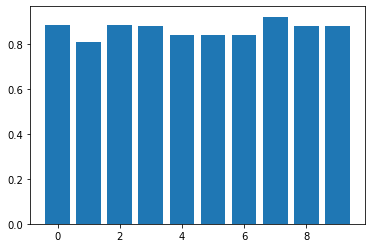

In [93]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from matplotlib import pyplot as plt
# Lets visualise a distribution of the results
plt.bar(range(10), cv_all)

In [94]:
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
train_score

0.9407114624505929

In [95]:
# Is the score inside the range?
train_score > cv_all.min() and train_score < cv_all.max()

False

In [96]:
# Is the score is inside one sigma?
train_score - cv_mean < cv_std 

False

In [97]:
test_score = model.score(X_test, y_test)
test_score

0.9176470588235294

In [98]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=20, max_depth=2)
cross_val_score(m, X_train, y_train, cv=5, scoring='accuracy')

array([0.70588235, 0.76470588, 0.70588235, 0.76      , 0.64      ])

In [99]:
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.7470355731225297

In [100]:
m.score(X_test, y_test)

0.7529411764705882